In [21]:
import nibabel as nb
from glob import glob
import os
import numpy as np
from nilearn.plotting import plot_glass_brain
from nilearn.image import new_img_like

In [3]:
contr_files = glob('/project/3018040.05/info_coupling/contrasts/ba-17-18_contr-objscrvsbas_top-500_sub-*')

In [12]:
cf = contr_files[20]
thisvol = nb.load(os.path.join(cf, 'con_0002.nii'))
thisvol = thisvol.get_fdata()

In [13]:
thisvol.shape

(79, 95, 79)

In [17]:
allvols = []
for cf in contr_files:
    thisvol = nb.load(os.path.join(cf, 'con_0002.nii')).get_fdata()
    allvols.append(thisvol[np.newaxis, :, :, :])
allvols = np.concatenate(allvols, axis=0)

In [18]:
allvols.shape

(35, 79, 95, 79)

In [19]:
meanvol = np.mean(allvols, axis=0)

In [24]:
meanvol = new_img_like(nb.load(os.path.join(contr_files[0], 'con_0001.nii')),
                      meanvol)

AttributeError: 'Nifti1Image' object has no attribute 'dtype'

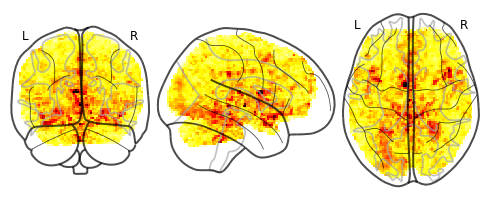

In [23]:
plot_glass_brain(meanvol)